In [ ]:
# default_exp gbe.wm.reliability

# Working memory task - Reliability

<div>
    <p align="left"><img src="images/wm_task.png" width = '200px'> 

    
   
    
</div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from trr265 import plotting
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.wm.data_provider import WMDataProvider
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
#df = df.query("is_initial and is_baseline")
print(len(df.participant.unique()))

df = df.query("is_baseline==True")
# Filtering participants with old app
print(len(df.participant.unique()))
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)

478
451
8 participants used an old version of the task in some of their sessions.  13 sessions (1.56%) were removed from the dataset.
10 sessions (1.22%) were removed because participants failed a level two trial.


## Test-retest reliability

### Based on maximum WMC level

#### No distractor (long)

R[write to console]: Lade nötiges Paket: psych

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.342,2.04,366.0,367.0,0.0,0.264,0.416,".34 (.26, .42)"
Single_random_raters,ICC2,0.342,2.04,366.0,366.0,0.0,0.264,0.416,".34 (.26, .42)"
Single_fixed_raters,ICC3,0.342,2.04,366.0,366.0,0.0,0.264,0.416,".34 (.26, .42)"
Average_raters_absolute,ICC1k,0.510,2.04,366.0,367.0,0.0,0.418,0.587,".51 (.42, .59)"
Average_random_raters,ICC2k,0.510,2.04,366.0,366.0,0.0,0.418,0.587,".51 (.42, .59)"
Average_fixed_raters,ICC3k,0.510,2.04,366.0,366.0,0.0,0.418,0.587,".51 (.42, .59)"


,variance,Percent
ID,0.356,0.342
Items,0.000,0.000
Residual,0.685,0.658
Total,1.042,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


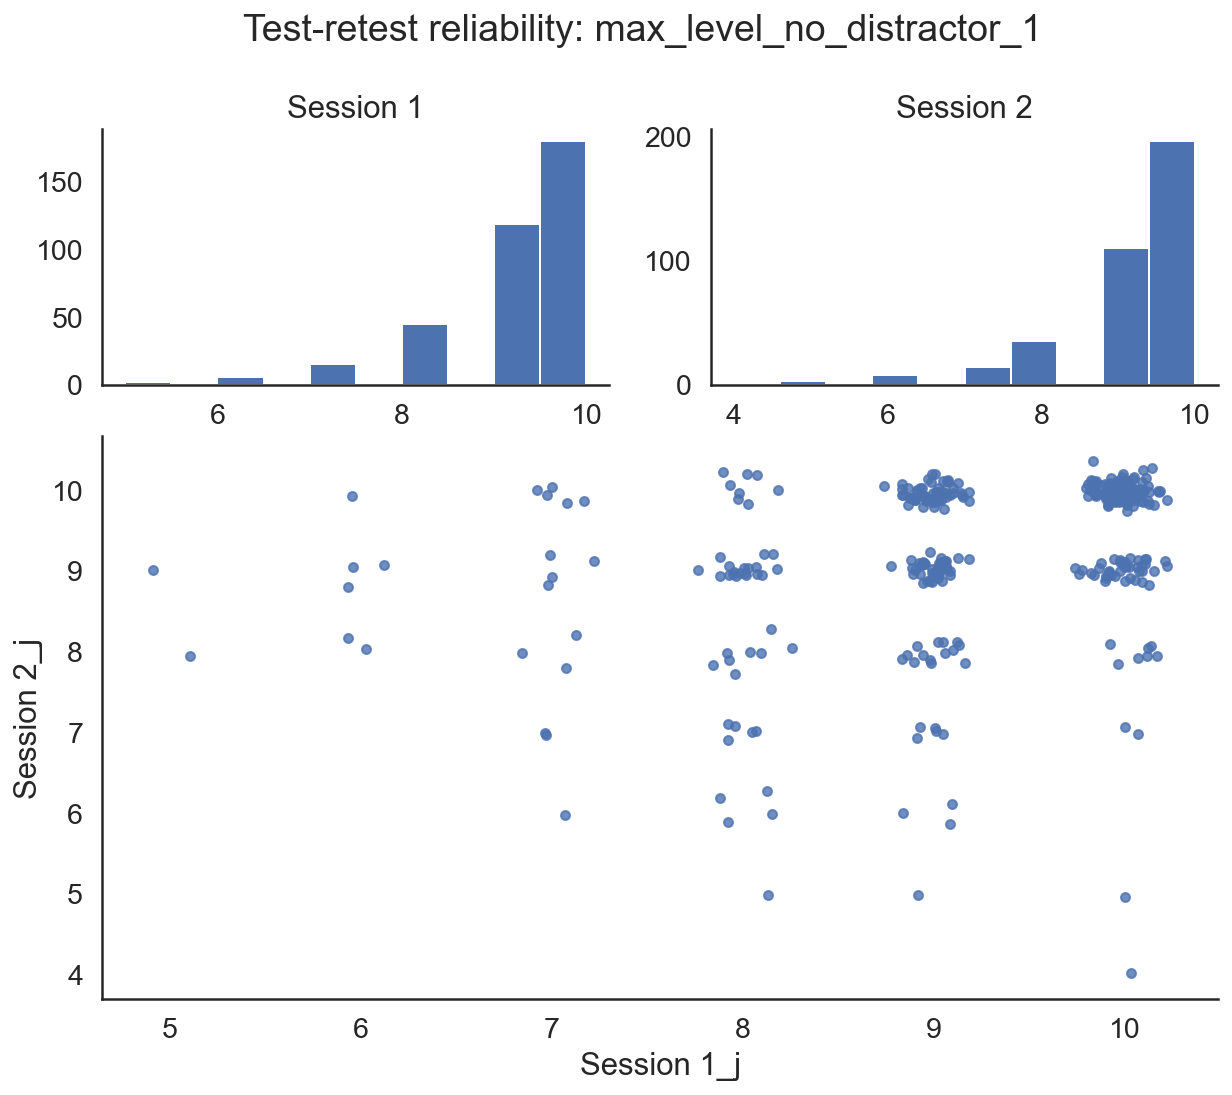

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_1', add_jitter = True)

#### No distractor (short)

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.422,2.458,366.0,367.0,0.0,0.348,0.490,".42 (.35, .49)"
Single_random_raters,ICC2,0.422,2.458,366.0,366.0,0.0,0.348,0.490,".42 (.35, .49)"
Single_fixed_raters,ICC3,0.422,2.458,366.0,366.0,0.0,0.348,0.490,".42 (.35, .49)"
Average_raters_absolute,ICC1k,0.593,2.458,366.0,367.0,0.0,0.517,0.657,".59 (.52, .66)"
Average_random_raters,ICC2k,0.593,2.458,366.0,366.0,0.0,0.517,0.657,".59 (.52, .66)"
Average_fixed_raters,ICC3k,0.593,2.458,366.0,366.0,0.0,0.517,0.657,".59 (.52, .66)"


,variance,Percent
ID,0.589,0.422
Items,0.000,0.000
Residual,0.808,0.578
Total,1.396,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


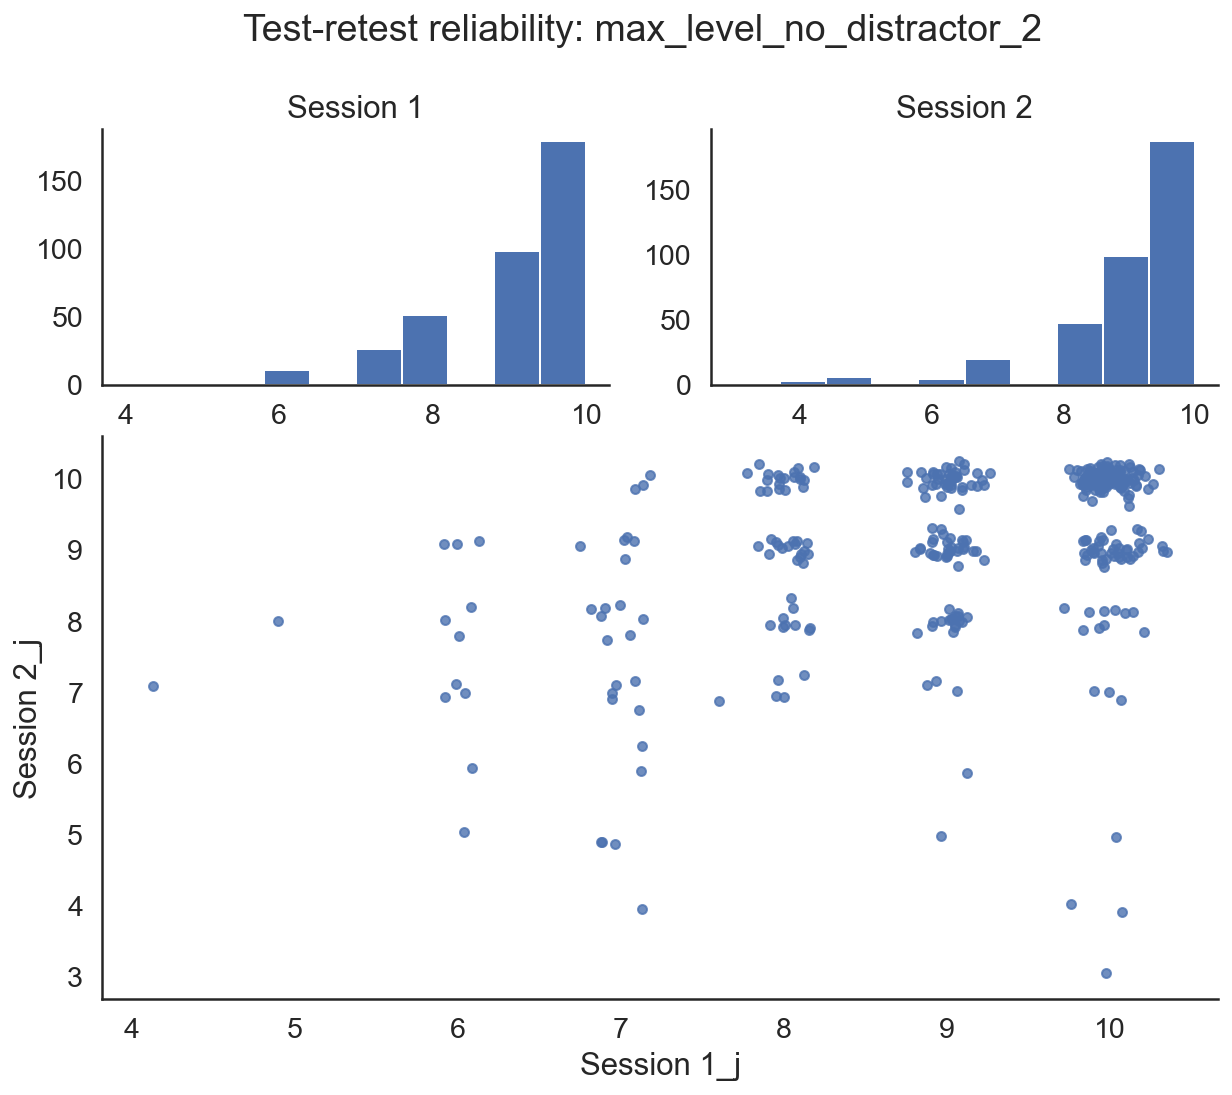

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'max_level_no_distractor_2', add_jitter = True)

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.336,2.011,366.0,367.0,0.0,0.257,0.410,".34 (.26, .41)"
Single_random_raters,ICC2,0.338,2.036,366.0,366.0,0.0,0.261,0.412,".34 (.26, .41)"
Single_fixed_raters,ICC3,0.341,2.036,366.0,366.0,0.0,0.263,0.415,".34 (.26, .41)"
Average_raters_absolute,ICC1k,0.503,2.011,366.0,367.0,0.0,0.409,0.581,".50 (.41, .58)"
Average_random_raters,ICC2k,0.506,2.036,366.0,366.0,0.0,0.413,0.584,".51 (.41, .58)"
Average_fixed_raters,ICC3k,0.509,2.036,366.0,366.0,0.0,0.417,0.587,".51 (.42, .59)"


,variance,Percent
ID,0.472,0.338
Items,0.011,0.008
Residual,0.911,0.653
Total,1.394,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


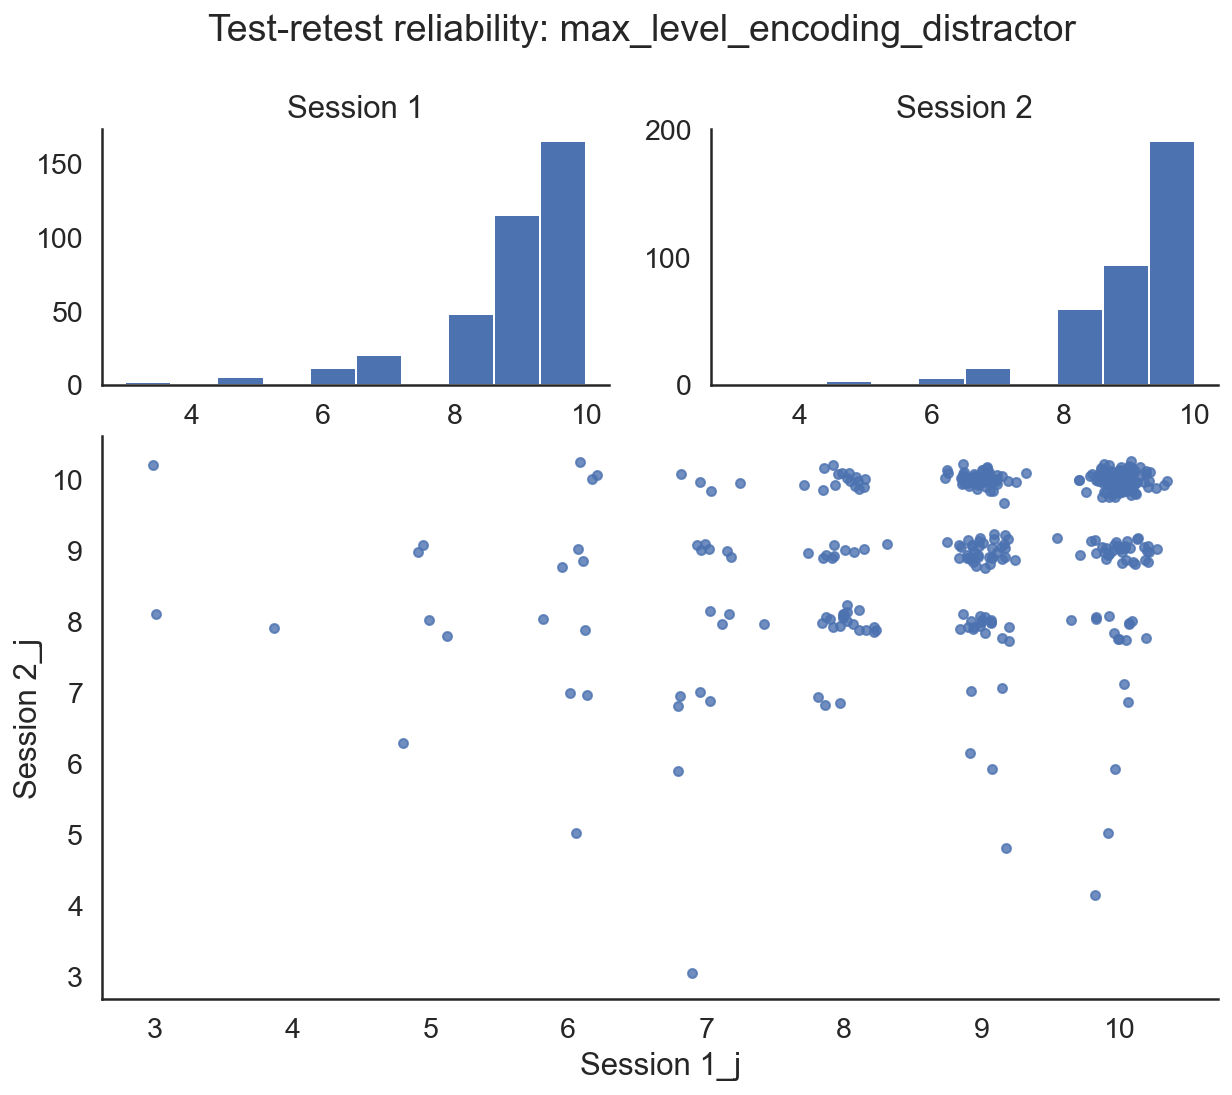

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_encoding_distractor = stats.analyze_reliability(_df, dependent = 'max_level_encoding_distractor', add_jitter = True)

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.423,2.467,366.0,367.0,0.0,0.350,0.491,".42 (.35, .49)"
Single_random_raters,ICC2,0.429,2.560,366.0,366.0,0.0,0.354,0.498,".43 (.35, .50)"
Single_fixed_raters,ICC3,0.438,2.560,366.0,366.0,0.0,0.366,0.505,".44 (.37, .51)"
Average_raters_absolute,ICC1k,0.595,2.467,366.0,367.0,0.0,0.519,0.659,".59 (.52, .66)"
Average_random_raters,ICC2k,0.600,2.560,366.0,366.0,0.0,0.523,0.665,".60 (.52, .66)"
Average_fixed_raters,ICC3k,0.609,2.560,366.0,366.0,0.0,0.536,0.671,".61 (.54, .67)"


,variance,Percent
ID,0.853,0.429
Items,0.041,0.021
Residual,1.094,0.550
Total,1.988,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


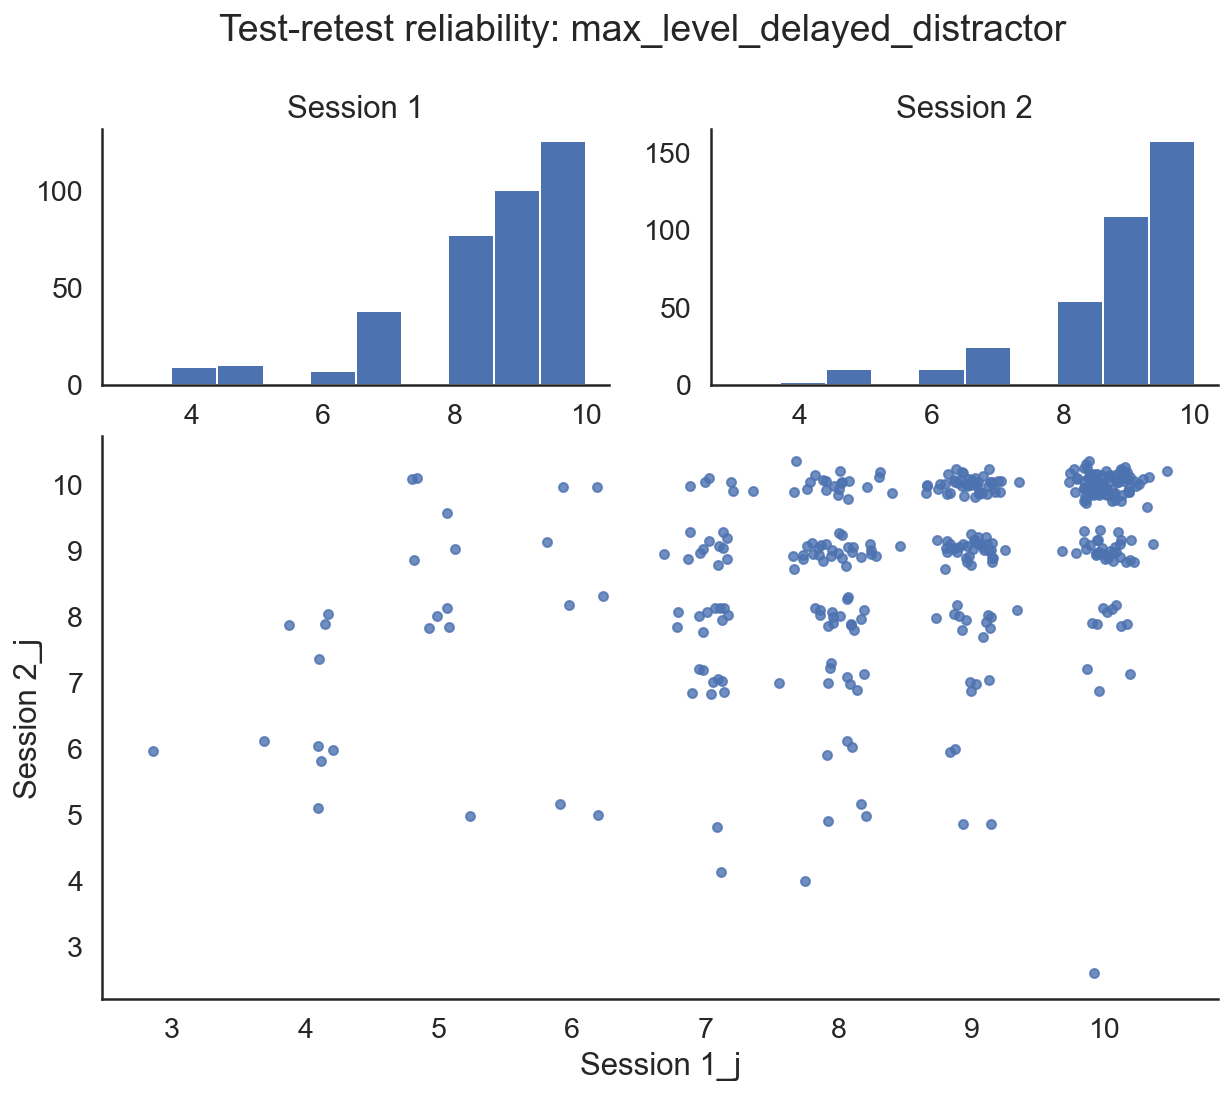

In [ ]:
_df = wm_scoring.get_max_levels(df)#['max_level_no_distractor_1']
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_delayed_distractor = stats.analyze_reliability(_df, dependent = 'max_level_delayed_distractor', add_jitter = True)

### Based on predicted values (separate models)

#### No distractor (long)

In [ ]:
_df = wm_scoring.get_perc_correct_predicted_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: Lade nötiges Paket: lme4

R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘lmerTest’


R[write to console]: Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    step




,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.383,2.242,366.0,367.0,0.0,0.307,0.454,".38 (.31, .45)"
Single_random_raters,ICC2,0.383,2.242,366.0,366.0,0.0,0.307,0.454,".38 (.31, .45)"
Single_fixed_raters,ICC3,0.383,2.242,366.0,366.0,0.0,0.307,0.454,".38 (.31, .45)"
Average_raters_absolute,ICC1k,0.554,2.242,366.0,367.0,0.0,0.470,0.624,".55 (.47, .62)"
Average_random_raters,ICC2k,0.554,2.242,366.0,366.0,0.0,0.470,0.624,".55 (.47, .62)"
Average_fixed_raters,ICC3k,0.554,2.242,366.0,366.0,0.0,0.470,0.625,".55 (.47, .62)"


,variance,Percent
ID,0.006,0.383
Items,0.000,0.000
Residual,0.009,0.617
Total,0.015,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


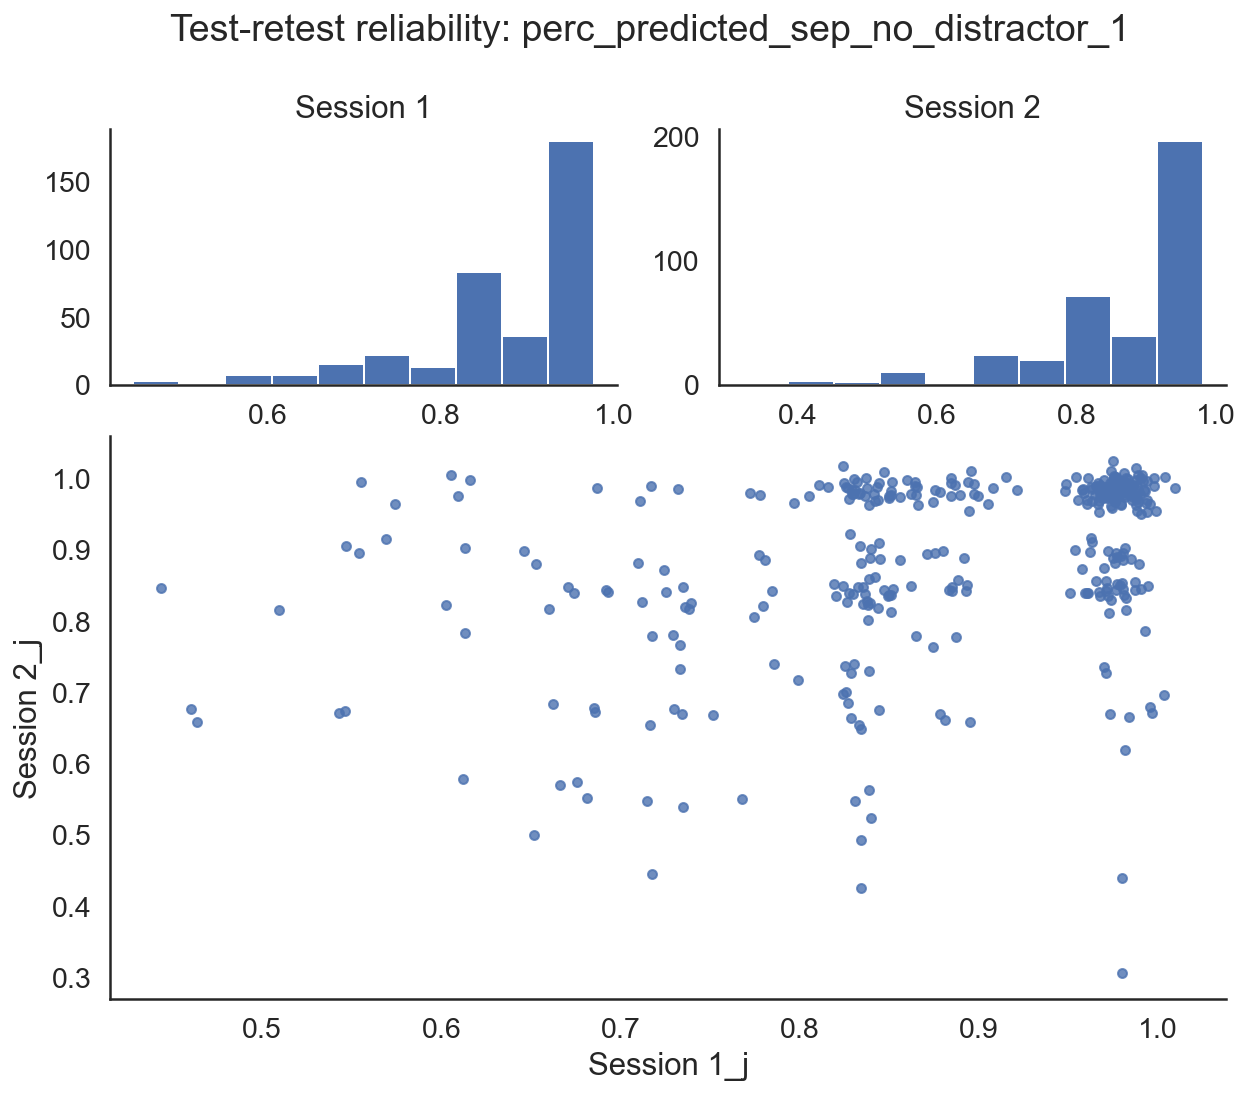

In [ ]:
iccs_perc_predicted_sep_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_no_distractor_1', add_jitter = True)

#### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.429,2.503,366.0,367.0,0.0,0.356,0.497,".43 (.36, .50)"
Single_random_raters,ICC2,0.429,2.503,366.0,366.0,0.0,0.356,0.497,".43 (.36, .50)"
Single_fixed_raters,ICC3,0.429,2.503,366.0,366.0,0.0,0.356,0.497,".43 (.36, .50)"
Average_raters_absolute,ICC1k,0.600,2.503,366.0,367.0,0.0,0.525,0.664,".60 (.53, .66)"
Average_random_raters,ICC2k,0.600,2.503,366.0,366.0,0.0,0.525,0.664,".60 (.53, .66)"
Average_fixed_raters,ICC3k,0.600,2.503,366.0,366.0,0.0,0.525,0.664,".60 (.53, .66)"


,variance,Percent
ID,0.009,0.429
Items,0.000,0.000
Residual,0.012,0.571
Total,0.021,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


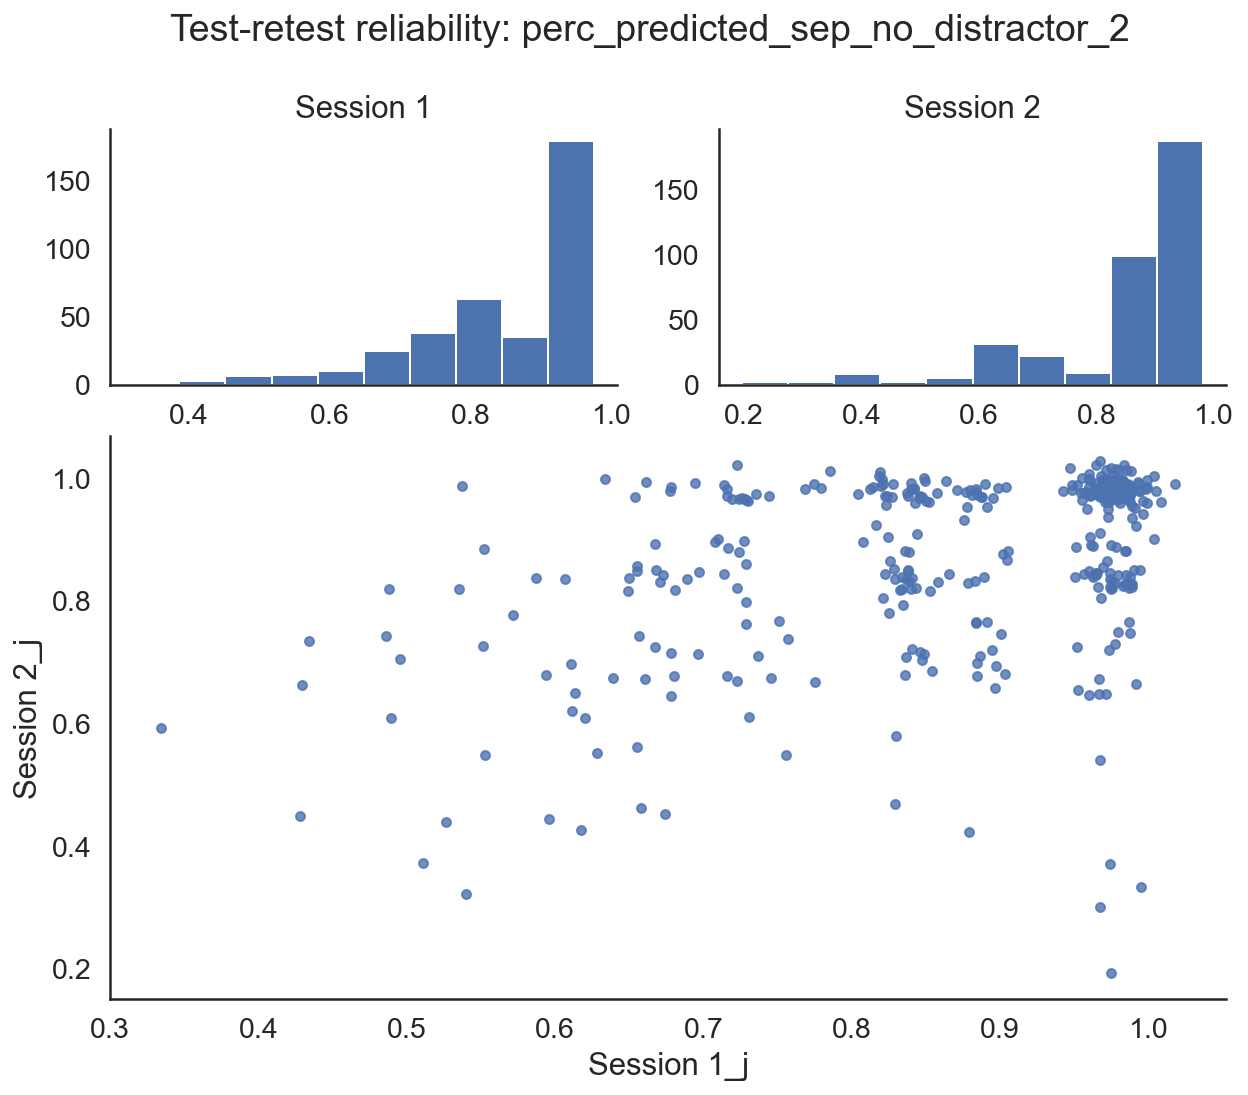

In [ ]:
iccs_perc_predicted_sep_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_no_distractor_2', add_jitter = True)

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.351,2.083,366.0,367.0,0.0,0.274,0.424,".35 (.27, .42)"
Single_random_raters,ICC2,0.355,2.119,366.0,366.0,0.0,0.278,0.428,".35 (.28, .43)"
Single_fixed_raters,ICC3,0.359,2.119,366.0,366.0,0.0,0.282,0.431,".36 (.28, .43)"
Average_raters_absolute,ICC1k,0.520,2.083,366.0,367.0,0.0,0.430,0.596,".52 (.43, .60)"
Average_random_raters,ICC2k,0.524,2.119,366.0,366.0,0.0,0.435,0.599,".52 (.43, .60)"
Average_fixed_raters,ICC3k,0.528,2.119,366.0,366.0,0.0,0.440,0.603,".53 (.44, .60)"


,variance,Percent
ID,0.007,0.355
Items,0.000,0.011
Residual,0.013,0.634
Total,0.020,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


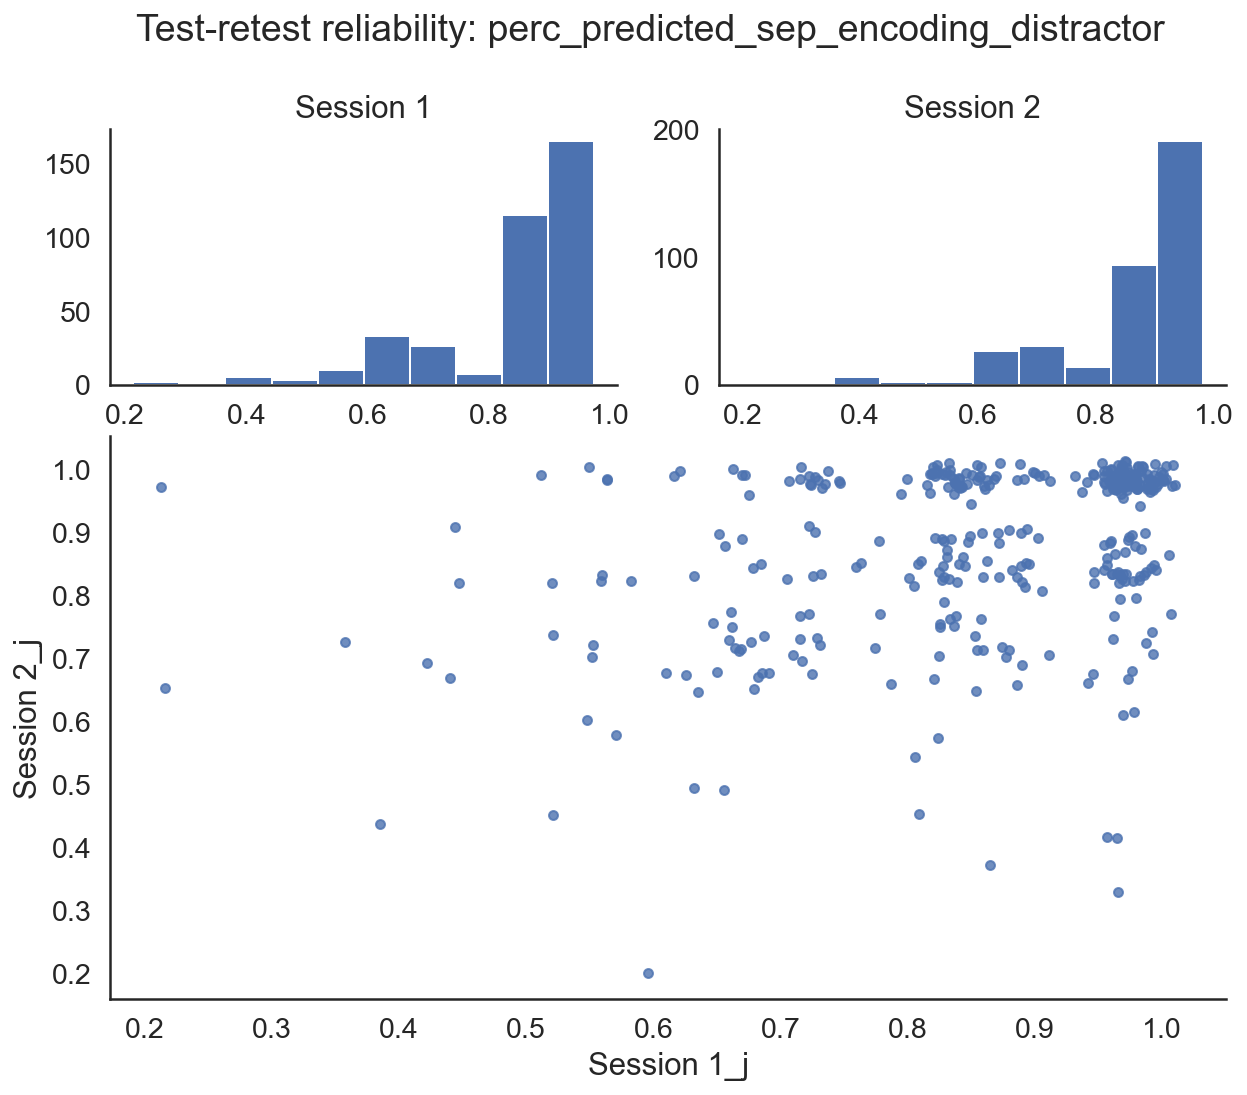

In [ ]:
perc_predicted_sep_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_encoding_distractor', add_jitter = True)

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.457,2.680,366.0,367.0,0.0,0.386,0.522,".46 (.39, .52)"
Single_random_raters,ICC2,0.465,2.838,366.0,366.0,0.0,0.388,0.534,".46 (.39, .53)"
Single_fixed_raters,ICC3,0.479,2.838,366.0,366.0,0.0,0.410,0.542,".48 (.41, .54)"
Average_raters_absolute,ICC1k,0.627,2.680,366.0,367.0,0.0,0.557,0.686,".63 (.56, .69)"
Average_random_raters,ICC2k,0.634,2.838,366.0,366.0,0.0,0.559,0.696,".63 (.56, .70)"
Average_fixed_raters,ICC3k,0.648,2.838,366.0,366.0,0.0,0.581,0.703,".65 (.58, .70)"


,variance,Percent
ID,0.013,0.465
Items,0.001,0.030
Residual,0.014,0.506
Total,0.027,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


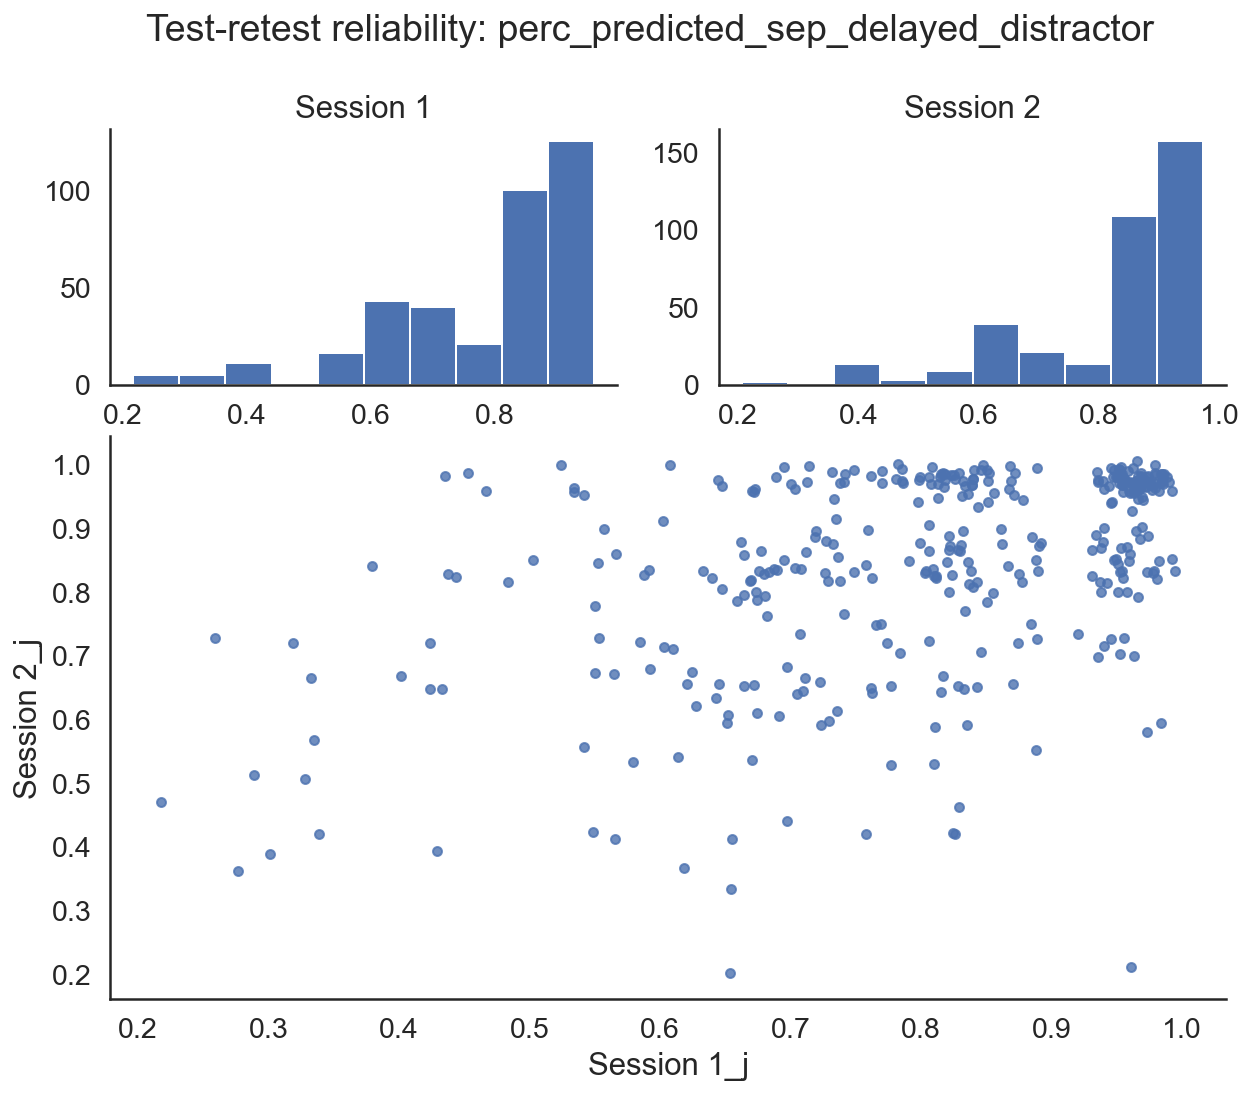

In [ ]:
perc_predicted_sep_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_delayed_distractor', add_jitter = True)

### Based on predicted values (joint model)

#### No distractor (long)

In [ ]:
_df, ms = wm_scoring.get_perc_correct_predicted_sep_trial(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.574,3.699,366.0,367.0,0.0,0.514,0.629,".57 (.51, .63)"
Single_random_raters,ICC2,0.574,3.699,366.0,366.0,0.0,0.514,0.629,".57 (.51, .63)"
Single_fixed_raters,ICC3,0.574,3.699,366.0,366.0,0.0,0.514,0.629,".57 (.51, .63)"
Average_raters_absolute,ICC1k,0.730,3.699,366.0,367.0,0.0,0.679,0.772,".73 (.68, .77)"
Average_random_raters,ICC2k,0.730,3.699,366.0,366.0,0.0,0.679,0.772,".73 (.68, .77)"
Average_fixed_raters,ICC3k,0.730,3.699,366.0,366.0,0.0,0.679,0.772,".73 (.68, .77)"


,variance,Percent
ID,0.009,0.574
Items,0.000,0.000
Residual,0.006,0.426
Total,0.015,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


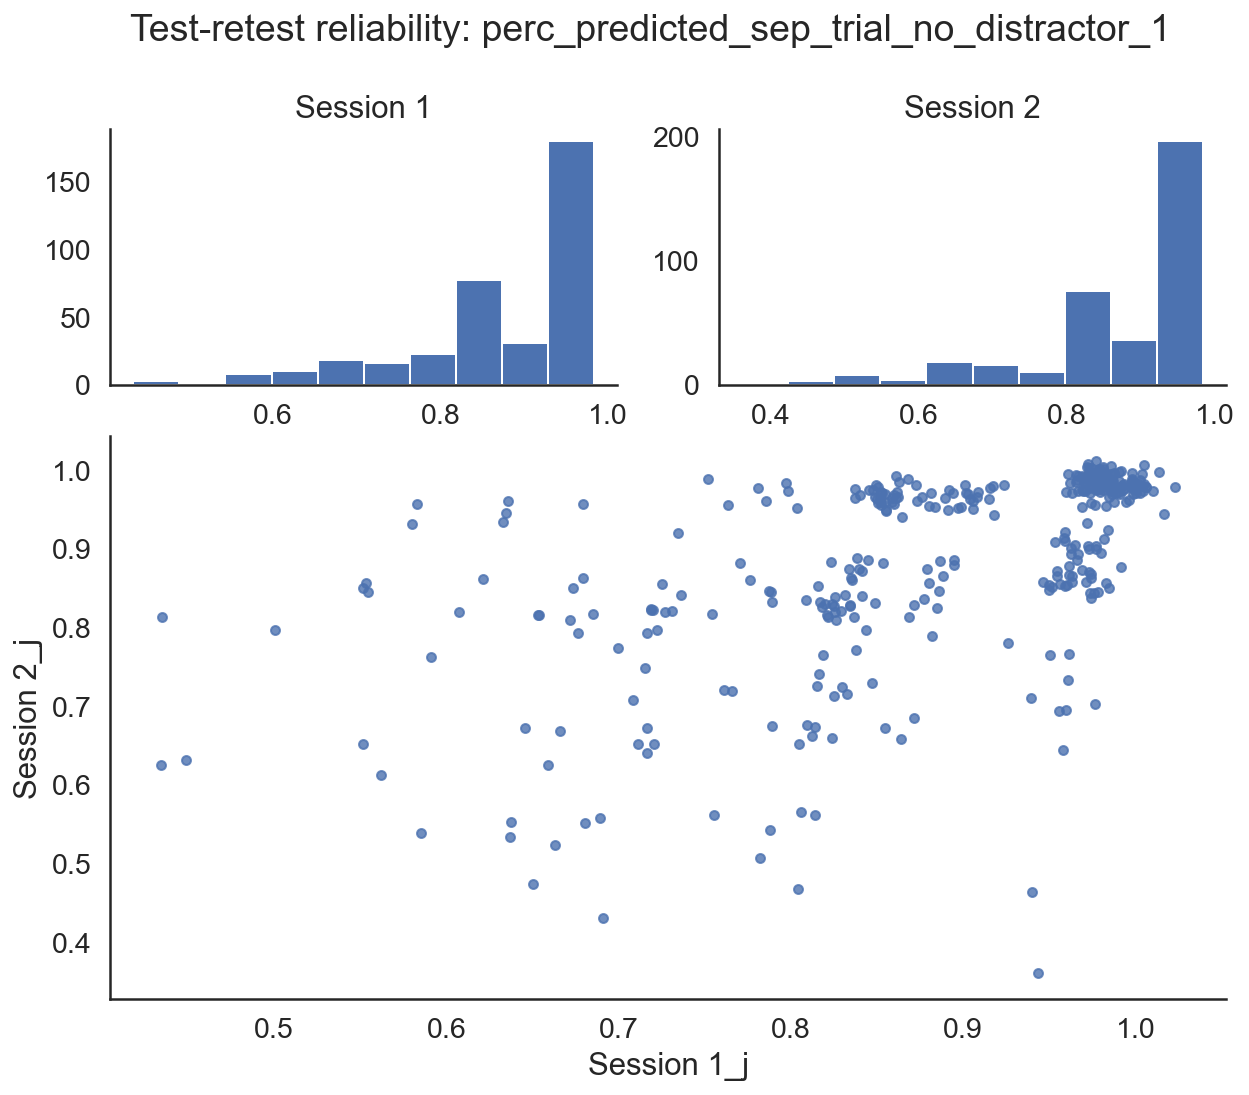

In [ ]:
iccs_perc_predicted_sep_trial_no_distractor_1 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_no_distractor_1', add_jitter = True)

In [ ]:
def get_model_calculated_icc(m):
    %R require(insight) -i m
    %R var_sess <- get_variance_intercept(m)[1]
    %R var_pp <- get_variance_intercept(m)[2]
    %R icc <- var_pp / (var_pp+(var_sess)) -o icc -o var_sess -o var_pp
    # Note that what get_variance_intercept outputs as session variance, we call residual, here
    variances = pd.DataFrame({"type":["Participant","Session","Residual"],"variance":[var_pp[0],0,var_sess[0]]})
    variances["Percent"] = variances.variance/variances.variance.sum()
    variances = {'iccs':[None, variances]}
    return {'icc':icc[0],'variances':variances}

iccs_perc_predicted_sep_trial_mod_no_distractor_1 = get_model_calculated_icc(ms['no_distractor_1'])
iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']

R[write to console]: Lade nötiges Paket: insight



0.6189627835688374

#### No distractor (short)

R[write to console]: boundary (singular) fit: see ?isSingular



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.574,3.7,366.0,367.0,0.0,0.514,0.629,".57 (.51, .63)"
Single_random_raters,ICC2,0.574,3.7,366.0,366.0,0.0,0.514,0.629,".57 (.51, .63)"
Single_fixed_raters,ICC3,0.574,3.7,366.0,366.0,0.0,0.514,0.629,".57 (.51, .63)"
Average_raters_absolute,ICC1k,0.730,3.7,366.0,367.0,0.0,0.679,0.772,".73 (.68, .77)"
Average_random_raters,ICC2k,0.730,3.7,366.0,366.0,0.0,0.679,0.772,".73 (.68, .77)"
Average_fixed_raters,ICC3k,0.730,3.7,366.0,366.0,0.0,0.679,0.772,".73 (.68, .77)"


,variance,Percent
ID,0.012,0.574
Items,0.000,0.000
Residual,0.009,0.426
Total,0.021,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


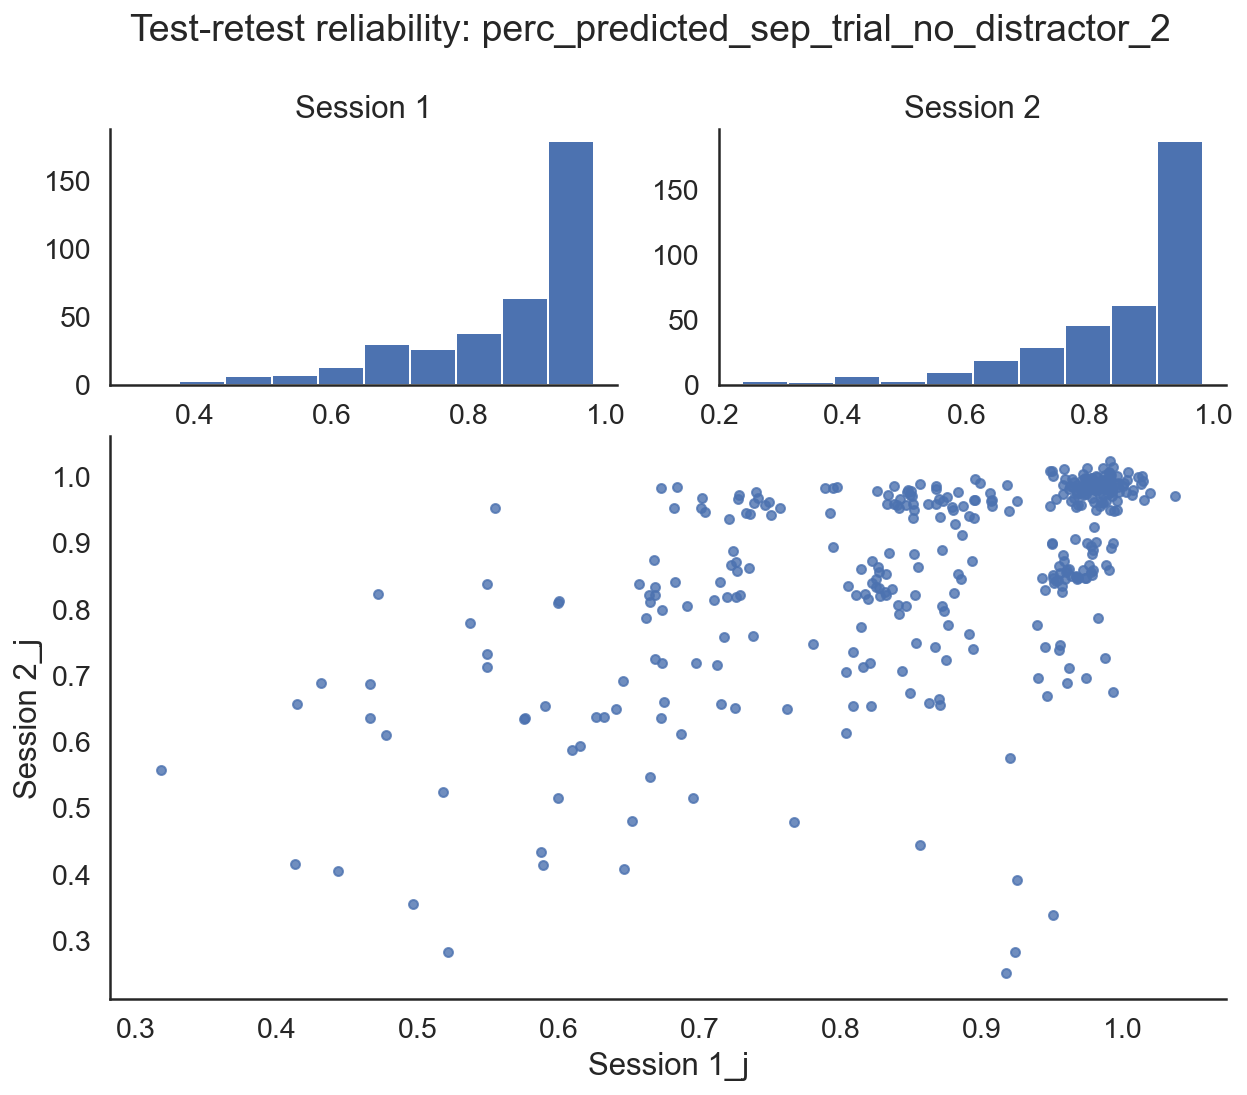

In [ ]:
iccs_perc_predicted_sep_trial_no_distractor_2 = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_no_distractor_2', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_2 = get_model_calculated_icc(ms['no_distractor_2'])
iccs_perc_predicted_sep_trial_mod_no_distractor_2['icc']

0.5701776728670459

#### Encoding distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.489,2.914,366.0,367.0,0.0,0.421,0.552,".49 (.42, .55)"
Single_random_raters,ICC2,0.490,2.945,366.0,366.0,0.0,0.422,0.553,".49 (.42, .55)"
Single_fixed_raters,ICC3,0.493,2.945,366.0,366.0,0.0,0.425,0.555,".49 (.43, .56)"
Average_raters_absolute,ICC1k,0.657,2.914,366.0,367.0,0.0,0.592,0.711,".66 (.59, .71)"
Average_random_raters,ICC2k,0.658,2.945,366.0,366.0,0.0,0.594,0.712,".66 (.59, .71)"
Average_fixed_raters,ICC3k,0.660,2.945,366.0,366.0,0.0,0.597,0.714,".66 (.60, .71)"


,variance,Percent
ID,0.01,0.490
Items,0.00,0.005
Residual,0.01,0.504
Total,0.02,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


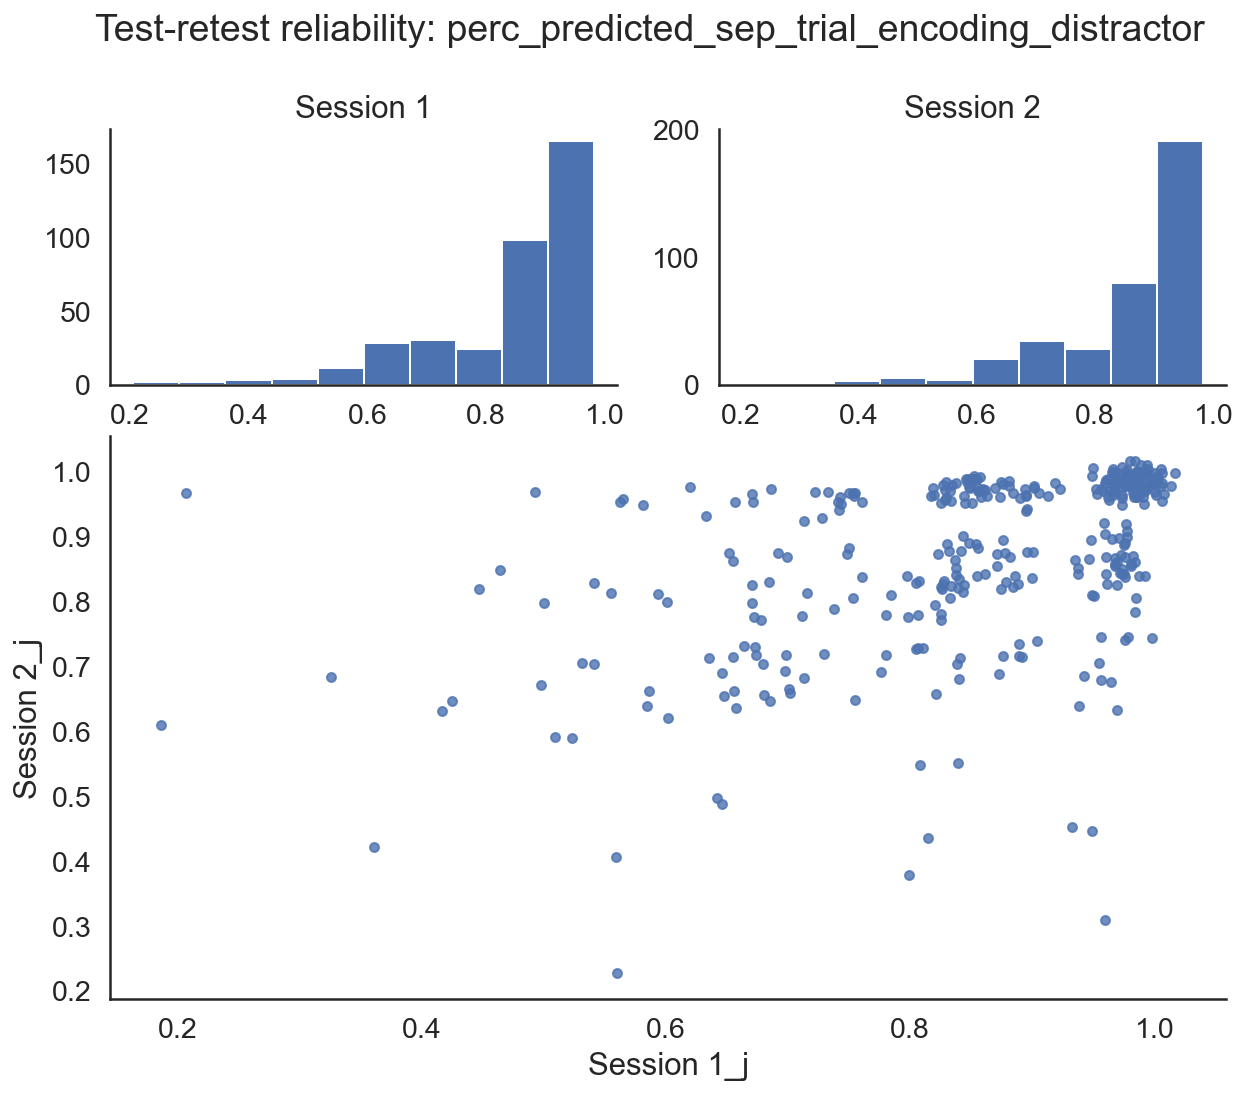

In [ ]:
perc_predicted_sep_trial_encoding_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_encoding_distractor', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_encoding_distractor = get_model_calculated_icc(ms['encoding_distractor'])
iccs_perc_predicted_sep_trial_mod_encoding_distractor['icc']

0.5078922188139144

#### Delayed distractor

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.636,4.489,366.0,367.0,0.0,0.582,0.684,".64 (.58, .68)"
Single_random_raters,ICC2,0.638,4.656,366.0,366.0,0.0,0.580,0.689,".64 (.58, .69)"
Single_fixed_raters,ICC3,0.646,4.656,366.0,366.0,0.0,0.593,0.694,".65 (.59, .69)"
Average_raters_absolute,ICC1k,0.777,4.489,366.0,367.0,0.0,0.735,0.812,".78 (.74, .81)"
Average_random_raters,ICC2k,0.779,4.656,366.0,366.0,0.0,0.735,0.816,".78 (.73, .82)"
Average_fixed_raters,ICC3k,0.785,4.656,366.0,366.0,0.0,0.745,0.819,".79 (.74, .82)"


,variance,Percent
ID,0.017,0.638
Items,0.000,0.013
Residual,0.009,0.349
Total,0.027,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


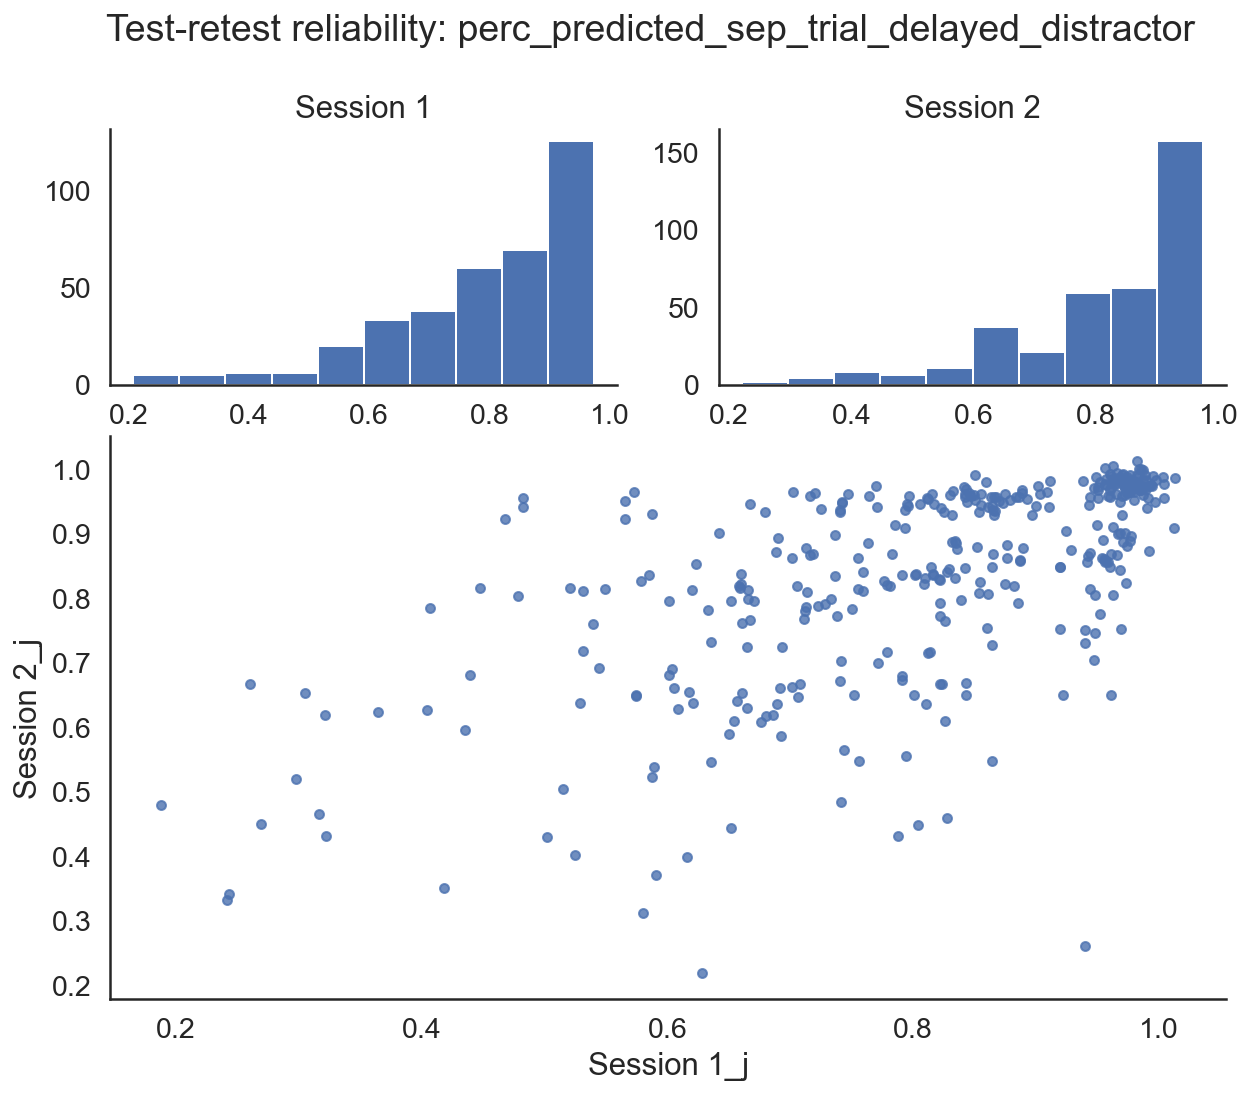

In [ ]:
perc_predicted_sep_trial_delayed_distractor = stats.analyze_reliability(_df, dependent = 'perc_predicted_sep_trial_delayed_distractor', add_jitter = True)

In [ ]:
iccs_perc_predicted_sep_trial_mod_delayed_distractor = get_model_calculated_icc(ms['delayed_distractor'])
iccs_perc_predicted_sep_trial_mod_delayed_distractor['icc']

0.611953204470722

### Based on model-calculated variances

#### No distractor (long)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_1 = stats.get_model_calculated_icc(ms['no_distractor_1'])
iccs_perc_predicted_sep_trial_mod_no_distractor_1['icc']

0.6189627835688374

#### No distractor (short)

In [ ]:
iccs_perc_predicted_sep_trial_mod_no_distractor_2 = stats.get_model_calculated_icc(ms['no_distractor_2'])
iccs_perc_predicted_sep_trial_mod_no_distractor_2['icc']

0.5701776728670459

#### Enconding distractor

In [ ]:
iccs_perc_predicted_sep_trial_mod_encoding_distractor = stats.get_model_calculated_icc(ms['encoding_distractor'])
iccs_perc_predicted_sep_trial_mod_encoding_distractor['icc']

0.5078922188139144

#### Delayed distractor

In [ ]:
iccs_perc_predicted_sep_trial_mod_delayed_distractor = stats.get_model_calculated_icc(ms['delayed_distractor'])
iccs_perc_predicted_sep_trial_mod_delayed_distractor['icc']

0.611953204470722

## Comparison of methods

### All methods

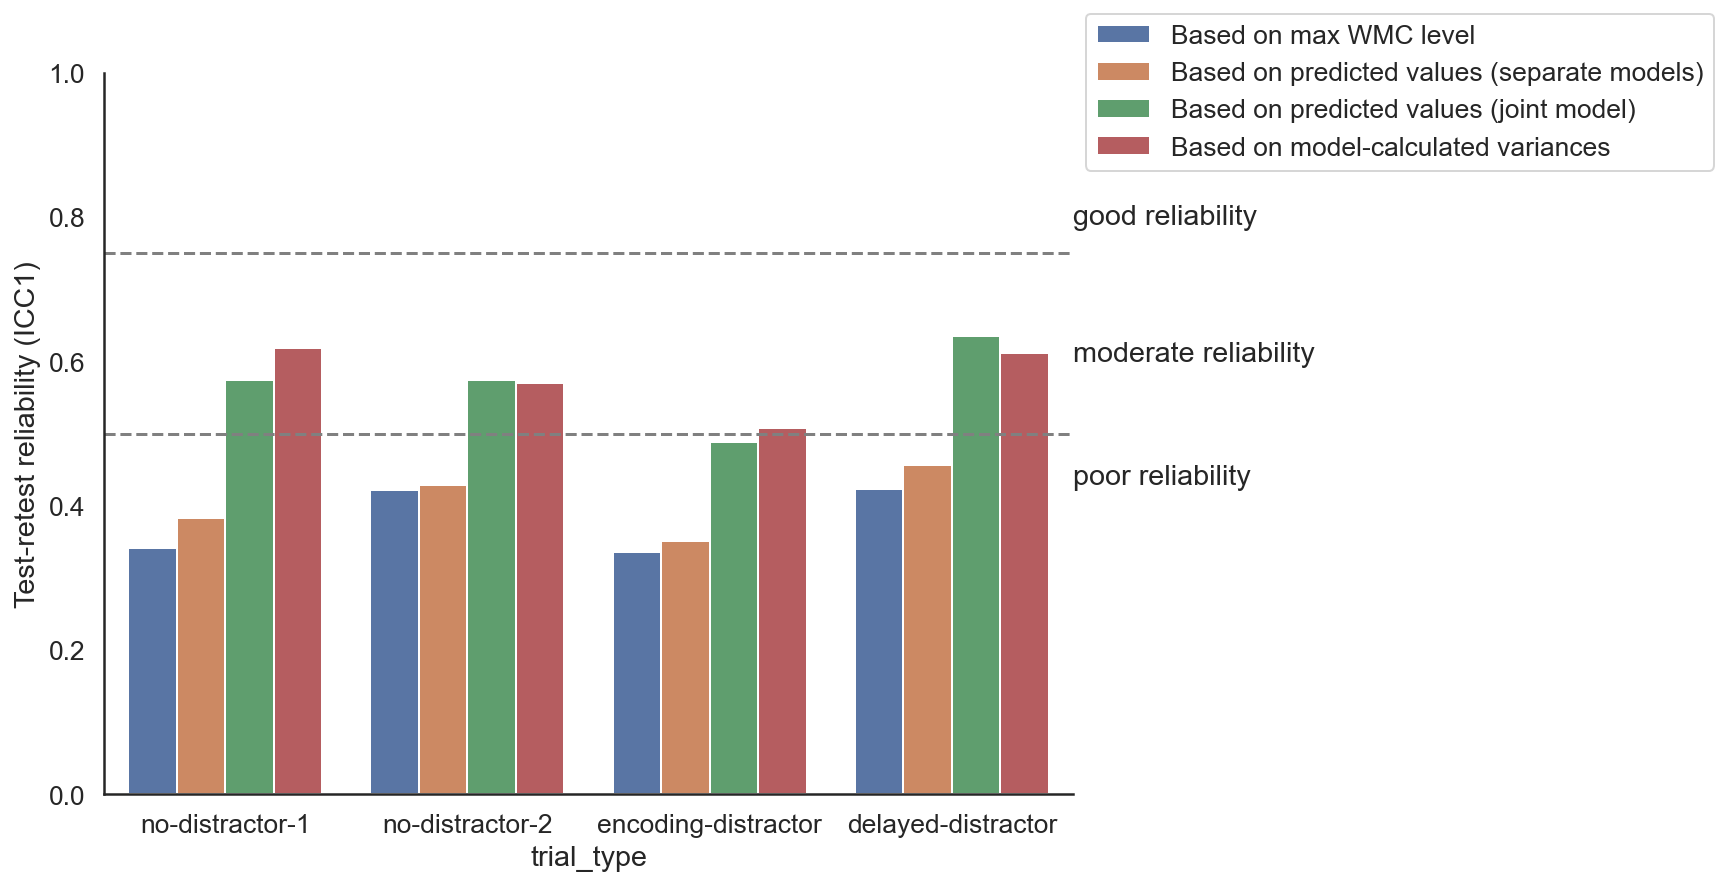

In [ ]:
iccs = {
    "Based on max WMC level_no-distractor-1": iccs_mean_no_distractor_1,
    "Based on max WMC level_no-distractor-2": iccs_mean_no_distractor_2,
    "Based on max WMC level_encoding-distractor": iccs_mean_encoding_distractor,
    "Based on max WMC level_delayed-distractor": iccs_mean_delayed_distractor,
    "trial_sep_no-distractor-1": iccs_perc_predicted_sep_no_distractor_1,
    "trial_sep_no-distractor-2": iccs_perc_predicted_sep_no_distractor_2,
    "trial_sep_encoding-distractor": perc_predicted_sep_encoding_distractor,
    "trial_sep_delayed-distractor": perc_predicted_sep_delayed_distractor,
    "trial_joint_no-distractor-1": iccs_perc_predicted_sep_trial_no_distractor_1,
    "trial_joint_no-distractor-2": iccs_perc_predicted_sep_trial_no_distractor_2,
    "trial_joint_encoding-distractor": perc_predicted_sep_trial_encoding_distractor,
    "trial_joint_delayed-distractor": perc_predicted_sep_trial_delayed_distractor,
    "model_calc_no-distractor-1": iccs_perc_predicted_sep_trial_mod_no_distractor_1,
    "model_calc_no-distractor-2": iccs_perc_predicted_sep_trial_mod_no_distractor_2,
    "model_calc_encoding-distractor": iccs_perc_predicted_sep_trial_mod_encoding_distractor,
    "model_calc_delayed-distractor": iccs_perc_predicted_sep_trial_mod_delayed_distractor  
}


g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 3.5, font_scale = 1.2)

### Selected methods for manuscript

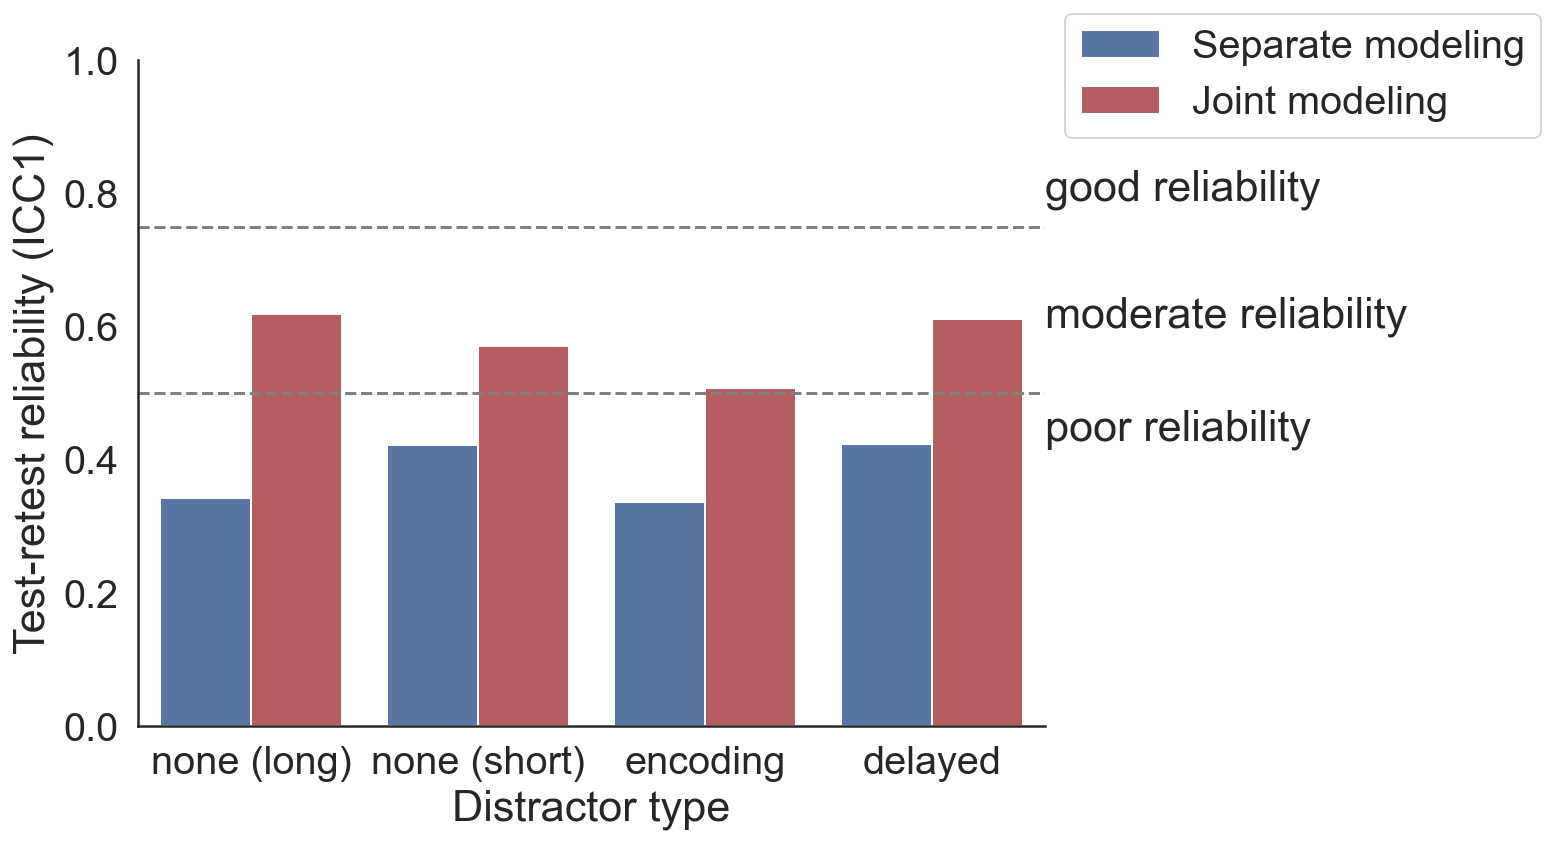

In [ ]:
iccs = {
    "Separate modeling_none (long)": iccs_mean_no_distractor_1,
    "Joint modeling_none (long)": iccs_perc_predicted_sep_trial_mod_no_distractor_1,
    "Separate modeling_none (short)": iccs_mean_no_distractor_2,
    "Joint modeling_none (short)": iccs_perc_predicted_sep_trial_mod_no_distractor_2,
    "Separate modeling_encoding": iccs_mean_encoding_distractor,
    "Joint modeling_encoding": iccs_perc_predicted_sep_trial_mod_encoding_distractor, 
    "Separate modeling_delayed": iccs_mean_delayed_distractor,
    "Joint modeling_delayed": iccs_perc_predicted_sep_trial_mod_delayed_distractor, 
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = 1.3,
                       qualitative_labels = True,
                       x_offset = 3.5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('Distractor type');


## Variance proportions

### No distractor (long)

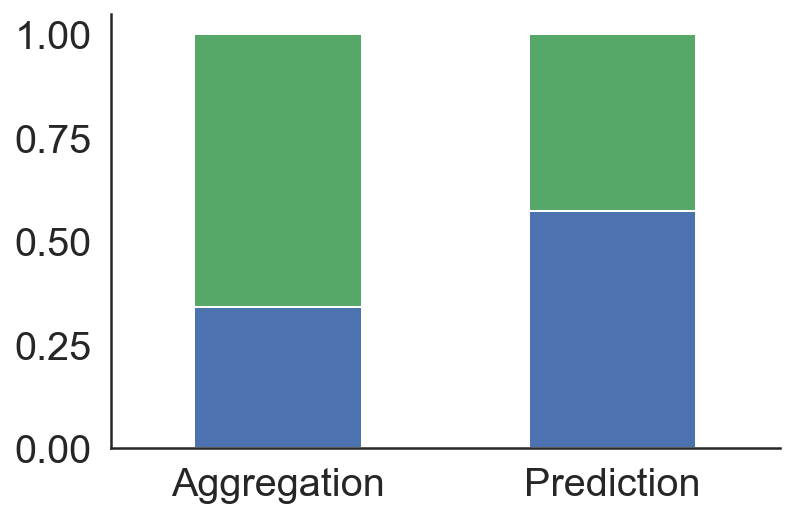

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_no_distractor_1,'Prediction':iccs_perc_predicted_sep_trial_no_distractor_1})
ax.get_legend().remove()

In [ ]:
def var_comp_plot_2(results):
    perc_variance = []
    for r in results.items():
        _df = r[1]['iccs'][1].T
        _df.columns = ['Participant','Session','Residual','Total']
        perc_variance.append(_df[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    display(df)
    df.iloc[1] = df.iloc[1]/df.iloc[0]
    df = (df-1)*100
    ax = df.iloc[1].plot(kind = 'bar', stacked = False, color = sns.color_palette()[:3])
    ax.grid(False)
    sns.despine()
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)
    ax.axhline(0, color = 'black')
    #ax.set_ylim([-100,100])
    return ax

,Participant,Session,Residual
Aggregation,0.342105,0.0,0.657895
Prediction,0.574411,0.0,0.425589


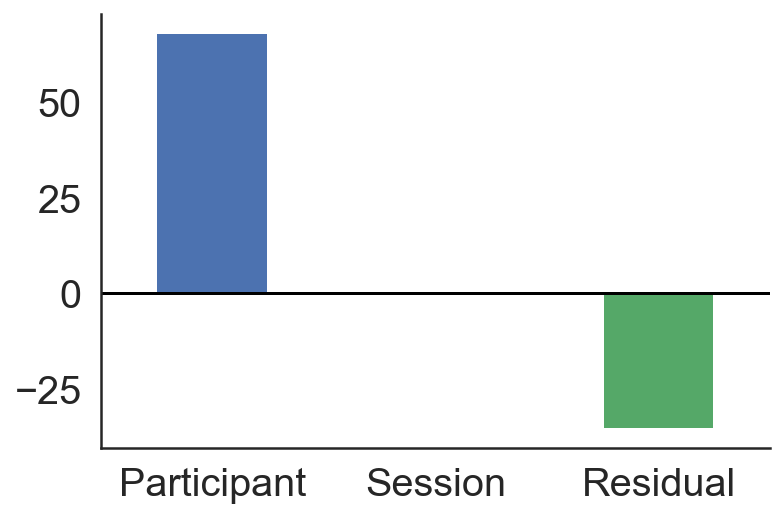

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_no_distractor_1,'Prediction':iccs_perc_predicted_sep_trial_no_distractor_1})
ax.get_legend().remove()

#### Why is there no session variance

### No distractor (short)

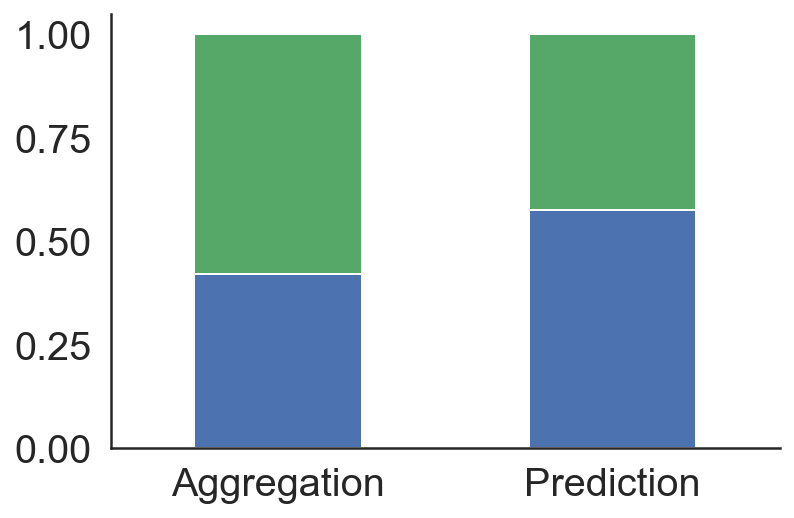

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_no_distractor_2,'Prediction':iccs_perc_predicted_sep_trial_no_distractor_2})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.421551,1.207571e-05,0.578437
Prediction,0.574474,6.246437e-11,0.425526


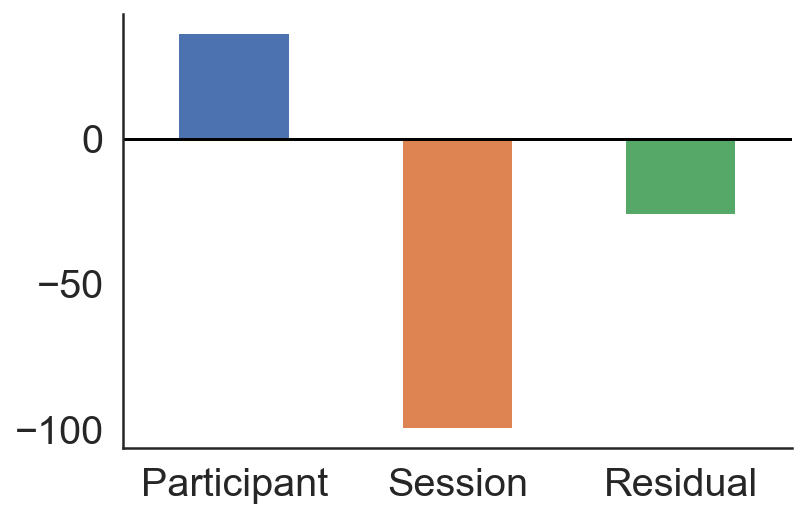

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_no_distractor_2,'Prediction':iccs_perc_predicted_sep_trial_no_distractor_2})
ax.get_legend().remove()

### Encoding distractor

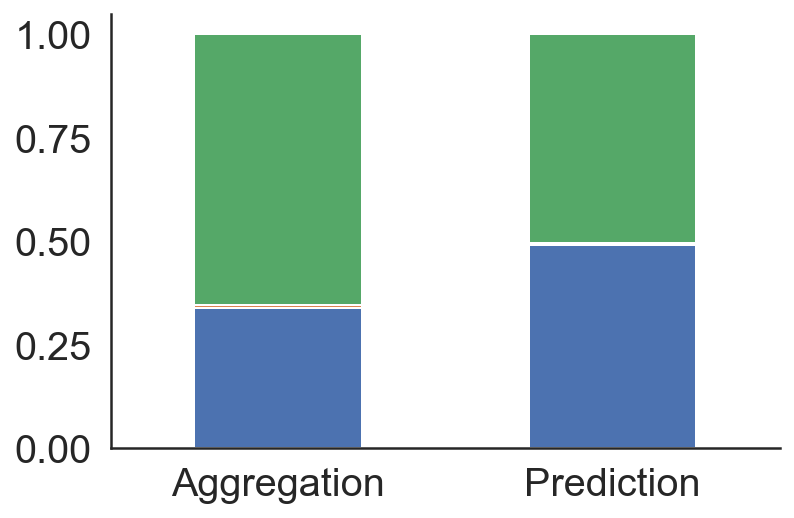

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_encoding_distractor,'Prediction':perc_predicted_sep_trial_encoding_distractor})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.338448,0.008127,0.653425
Prediction,0.490391,0.005352,0.504258


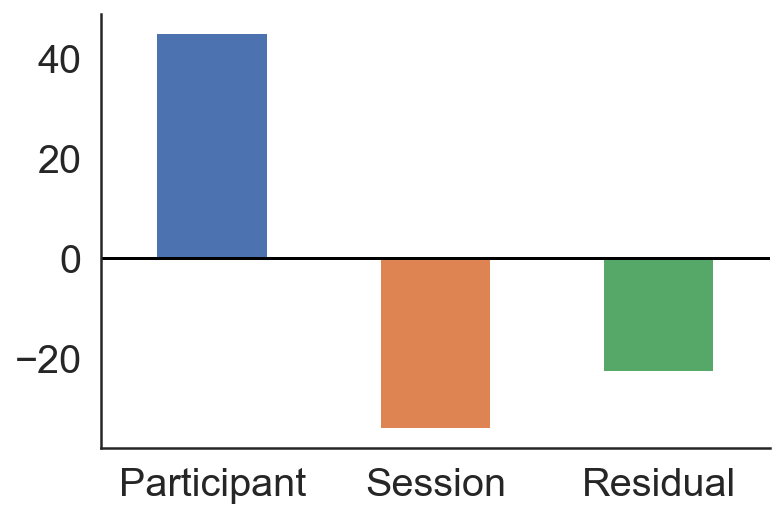

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_encoding_distractor,'Prediction':perc_predicted_sep_trial_encoding_distractor})
ax.get_legend().remove()

### Delayed distractor

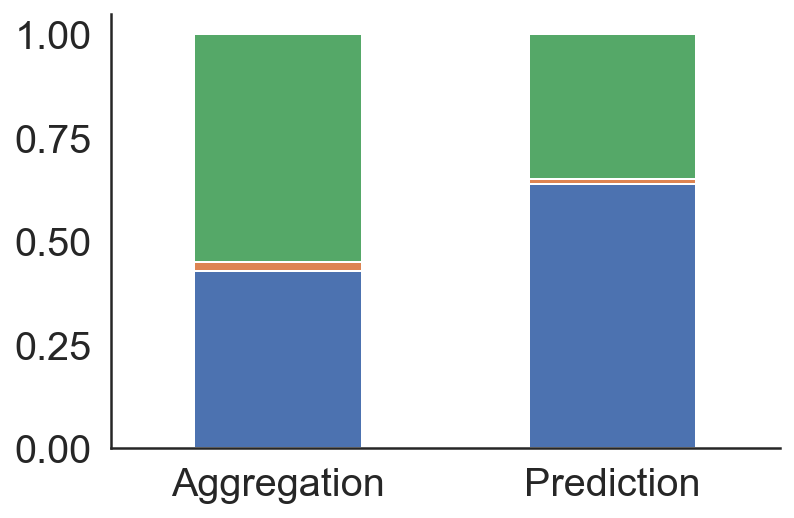

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_delayed_distractor,'Prediction':perc_predicted_sep_trial_delayed_distractor})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.429072,0.020687,0.550240
Prediction,0.638013,0.012994,0.348994


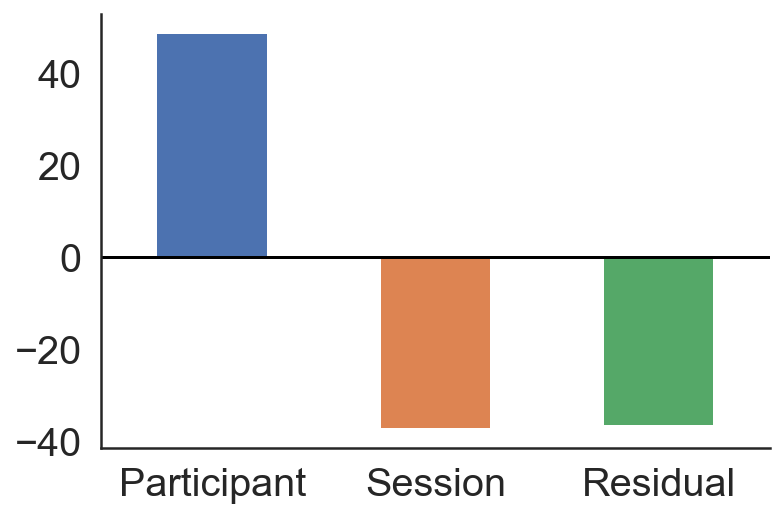

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_delayed_distractor,'Prediction':perc_predicted_sep_trial_delayed_distractor})
ax.get_legend().remove()

## Effect of time

In [ ]:
scores = stats.get_scores(dp, dp.get_wm_data, wm_scoring.get_perc_correct_predicted_sep_trial)

### No distractor (long)

In [ ]:
ax = plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_no_distractor_1")

NameError: name 'plot_time_effect_area' is not defined

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### No distractor (short)

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_no_distractor_2")

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### Encoding distractor

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_encoding_distractor")

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### Delayed distractor

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_delayed_distractor")

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

In [ ]:
stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor")

## Effect of time (percentage change)

### No distractor (long)

In [ ]:
stats.plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = False)

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_1", scaling = 'variance', change = True)

Note that these scores have 0 session variance in session one, which breaks the other calculations.

### No distractor (short)

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = False)

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_no_distractor_2", scaling = 'variance', change = True)

### Encoding distractor

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = False)

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_encoding_distractor", scaling = 'variance', change = True)

### Delayed distractor

In [ ]:
stats.plot_time_effect_area(scores, 8, "perc_predicted_sep_trial_delayed_distractor")

In [ ]:
def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    df = get_time_effect(_df, sessions, dependent, scaling)
    if change:
        df = (df/df.iloc[0])*100
        ax = df[['participant','session','residual']].plot(legend = legend)
        ax.figure.legend(bbox_to_anchor=[1.4, 1])
    else:
        ax = df.plot(y="icc", legend=False, color = 'black',linestyle = '--')
        ax.set_ylabel('icc', color = 'black')
        ax2 = ax.twinx()
        df.plot(y="session", ax=ax2, legend=False, color = sns.color_palette()[1])
        ax2.set_ylabel('session',color = sns.color_palette()[1])
        ax3 = ax.twinx()
        ax3.set_ylabel('residual',color = sns.color_palette()[2])
        ax3.spines["right"].set_position(("axes", 1.3))
        df.plot(y="residual", ax=ax3, legend=False, color = sns.color_palette()[2])
        ax4 = ax.twinx()
        ax4.set_ylabel('participant',color = sns.color_palette()[0])
        df.plot(y="participant", ax=ax4, legend=False, color = sns.color_palette()[0])
        ax4.spines["right"].set_position(("axes", 1.6))
        sns.despine(right=False)
    ax.xaxis.get_major_locator().set_params(integer=True)
plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = False)

In [ ]:
plot_time_effect(scores, 8, "perc_predicted_sep_trial_delayed_distractor", scaling = 'variance', change = True)